In [1]:
# importing tensorflow
import tensorflow as tf

## Loading MNIST dataset
### Containing training samples 60,000, testing samples = 10,000
#### Tensorflow already contain MNIST Dataset which can be loaded using keras

In [2]:
mnist = tf.keras.datasets.mnist

#### This is handwritten characters based on 28x28 sized images of 0 to 9

### Spliting into train and test datasets

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

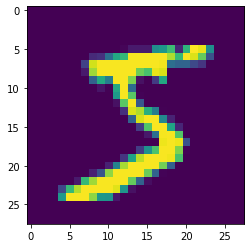

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])
plt.show()

### plotting the image in binary

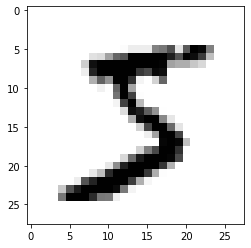

In [6]:
plt.imshow(x_train[0],cmap = plt.cm.binary)

### Checking the values of each pixel
### Before Normalization

In [7]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

### As images are in gray level, not coloured (RGB)
### Normalizing the data | Pre-Processing Step

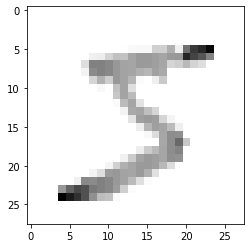

In [8]:
x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

### After Normalization

In [9]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### checking labels inside our network 

In [10]:
print(y_train[0])

5


### Resizing image to make it suitable for Convolution Operation

In [11]:
import numpy as np
img_size = 28
x_trainr= np.array(x_train).reshape(-1,img_size,img_size,1)
x_testr= np.array(x_test).reshape(-1,img_size,img_size,1)
print("Training Samples dimension",x_trainr.shape)
print("Testing Samples dimension",x_testr.shape)

Training Samples dimension (60000, 28, 28, 1)
Testing Samples dimension (10000, 28, 28, 1)


## Creating a Deep Neural Network
### Training on 60,000 samples of MNIST handwritten dataset

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [13]:
model = Sequential()

model.add(Conv2D(64,(3,3),input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(1))
model.add(Activation("softmax"))



In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
activation (Activation)      (None, 26, 26, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
activation_1 (Activation)    (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [15]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [16]:
import keras

In [17]:
model.compile(optimizer='adam',loss= keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [18]:
model.fit(x_trainr,y_train,epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 35s 27ms/step - loss: 0.0000e+00 - accuracy: 0.1143 - val_loss: 0.0000e+00 - val_accuracy: 0.1079
Epoch 2/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0000e+00 - accuracy: 0.1143 - val_loss: 0.0000e+00 - val_accuracy: 0.1079
Epoch 3/5
1313/1313 [==============================] - 33s 25ms/step - loss: 0.0000e+00 - accuracy: 0.1143 - val_loss: 0.0000e+00 - val_accuracy: 0.1079
Epoch 4/5
1313/1313 [==============================] - 31s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1143 - val_loss: 0.0000e+00 - val_accuracy: 0.1079
Epoch 5/5
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0000e+00 - accuracy: 0.1143 - val_loss: 0.0000e+00 - val_accuracy: 0.1079


In [19]:
test_loss, test_acc = model.evaluate(x_testr,y_test)
print("Test Loss on 10,000 test samples", test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0000e+00 - accuracy: 0.1135
Test Loss on 10,000 test samples 0.0
Validation Accuracy on 10,000 test samples 0.11349999904632568


### Predicting the image

In [20]:
predictions = model.predict([x_testr])

In [21]:
print (predictions)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]


In [22]:
print (np.argmax(predictions[0]))

0


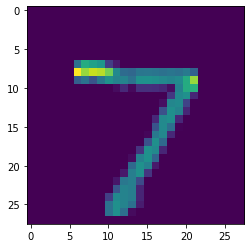

In [23]:
plt.imshow(x_test[0])

In [24]:
print (np.argmax(predictions[128]))

0


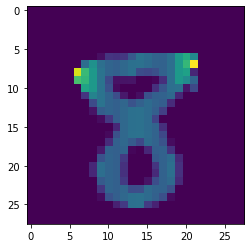

In [25]:
plt.imshow(x_test[128])

In [26]:
import cv2

#### Importing an image for prediction

In [27]:
img = cv2.imread('D:/Python/img.png')

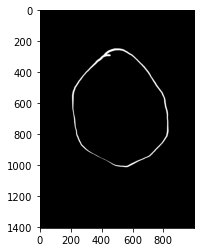

In [28]:
plt.imshow(img)

In [29]:
img.shape

(1407, 1000, 3)

In [30]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [31]:
gray.shape

(1407, 1000)

In [32]:
resized = cv2.resize(gray, (28,28),interpolation = cv2.INTER_AREA)

In [33]:
resized.shape

(28, 28)

In [34]:
newimg = tf.keras.utils.normalize (resized,axis=1)

In [35]:
newimg = np.array(newimg).reshape(-1,img_size,img_size,1)

In [36]:
newimg.shape

(1, 28, 28, 1)

In [37]:
predictions = model.predict(newimg)

In [38]:
print (np.argmax(predictions))

0
